# Modeling (Life Expectancy ; WHO)

In [192]:
import pandas as pd
from pprint import pprint

from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate 

import math
import statistics

import warnings
warnings.filterwarnings('ignore')

### Data

In [134]:
data=pd.read_csv('Converted_life_Data',index_col=[0])
data

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,65.0,263.0,55.0,0.01,71.279624,65.0,900.625,19.1,70.0,6.0,...,0,0,0,0,0,0,0,0,0,1
1,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,58.0,...,0,0,0,0,0,0,0,0,0,1
2,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,62.0,...,0,0,0,0,0,0,0,0,0,1
3,59.5,272.0,55.0,0.01,78.184215,67.0,900.625,17.6,70.0,67.0,...,0,0,0,0,0,0,0,0,0,1
4,59.2,275.0,55.0,0.01,7.097109,68.0,900.625,17.2,70.0,68.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27.0,4.36,0.000000,68.0,31.000,27.1,42.0,67.0,...,0,0,0,0,0,0,0,1,0,1
2934,44.5,715.0,26.0,4.06,0.000000,7.0,900.625,26.7,41.0,7.0,...,0,0,0,0,0,0,0,1,0,1
2935,44.8,73.0,25.0,4.43,0.000000,73.0,304.000,26.3,40.0,73.0,...,0,0,0,0,0,0,0,1,0,1
2936,45.3,686.0,25.0,1.72,0.000000,76.0,529.000,25.9,39.0,76.0,...,0,0,0,0,0,0,0,1,0,1


# Model Performance

In [135]:
def scores (y_true,y_pred):
    results=[r2_score(y_true,y_pred),mean_squared_error(y_true,y_pred), math.sqrt(mean_squared_error(y_true,y_pred))]
    return[round (x,2) for x in results]

# Models

In [136]:
def create_models (X_train,X_test,y_train,y_test):
    print('Linear Regression Model:')
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results=scores(y_test,y_pred)
    print(f'R2:{results[0]}, MSE:{results[1]}, RMSE:{results[2]}')
    print('\n')
    
    print('Decision Tree Model:')
    model=DecisionTreeRegressor()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results=scores(y_test,y_pred)
    print(f'R2:{results[0]}, MSE:{results[1]}, RMSE:{results[2]}')
    print('\n')
    
    print('Random Forest Model:')
    model=RandomForestRegressor()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results=scores(y_test,y_pred)
    print(f'R2:{results[0]}, MSE:{results[1]}, RMSE:{results[2]}')
    print('\n')
    
    print('SVM Model:')
    model=SVR()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results=scores(y_test,y_pred)
    print(f'R2:{results[0]}, MSE:{results[1]}, RMSE:{results[2]}')
    print('\n')
    
    print('KNN Model:')
    model=KNeighborsRegressor()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    results=scores(y_test,y_pred)
    print(f'R2:{results[0]}, MSE:{results[1]}, RMSE:{results[2]}')

### X and Y

In [150]:
X=data.drop(['Life expectancy'],axis=1).values
y=data['Life expectancy'].values

### Train Test Split

In [151]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [152]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 213)
(882, 213)
(2056,)
(882,)


# Data Scalling

In [153]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [154]:
create_models(X_train,X_test,y_train,y_test)

Linear Regression Model:
R2:-6.453701091516978e+21, MSE:6.0360870652135286e+23, RMSE:776922587212.75


Decision Tree Model:
R2:0.93, MSE:6.13, RMSE:2.48


Random Forest Model:
R2:0.97, MSE:3.2, RMSE:1.79


SVM Model:
R2:0.89, MSE:10.59, RMSE:3.25


KNN Model:
R2:0.93, MSE:6.54, RMSE:2.56


# Cross Validation using K-Fold

In [155]:
kf=KFold(n_splits=5, shuffle=False)

In [156]:
n=[]
for train, test in kf.split(X,y):
    model=LinearRegression()
    model.fit(X[train], y[train])
    y_pred=model.predict(X[test])
    results= [round(r2_score(y[test],y_pred),4), round(mean_squared_error(y[test],y_pred),4), 
              round(math.sqrt(mean_squared_error(y[test],y_pred)),4)]
    n.append(results)
    print('R2: {},\nMSE: {},\nRMSE: {},\n'.format(results[0],results[1],results[2]))

R2: 0.6869,
MSE: 33.4182,
RMSE: 5.7808,

R2: 0.6095,
MSE: 32.2097,
RMSE: 5.6754,

R2: 0.5169,
MSE: 38.3097,
RMSE: 6.1895,

R2: 0.7047,
MSE: 25.3128,
RMSE: 5.0312,

R2: 0.6347,
MSE: 34.5224,
RMSE: 5.8756,



In [157]:
print('Model:LinearRegression')
print('Average Values:')
avg=statistics.mean([x[0] for x in n]),statistics.mean([x[1] for x in n]),statistics.mean([x[2] for x in n])
print('R2: {:0.4f},\nMSE: {:0.4f}, \nRMSE: {:0.4f}'.format(avg[0],avg[1],avg[2]))

Model:LinearRegression
Average Values:
R2: 0.6305,
MSE: 32.7546, 
RMSE: 5.7105


In [158]:
n=[]
for train, test in kf.split(X,y):
    model=DecisionTreeRegressor()
    model.fit(X[train], y[train])
    y_pred=model.predict(X[test])
    results= [round(r2_score(y[test],y_pred),4), round(mean_squared_error(y[test],y_pred),4), 
              round(math.sqrt(mean_squared_error(y[test],y_pred)),4)]
    n.append(results)
    print('R2: {},\nMSE: {},\nRMSE: {},\n'.format(results[0],results[1],results[2]))

R2: 0.8777,
MSE: 13.0542,
RMSE: 3.6131,

R2: 0.7708,
MSE: 18.9006,
RMSE: 4.3475,

R2: 0.828,
MSE: 13.6393,
RMSE: 3.6931,

R2: 0.8671,
MSE: 11.394,
RMSE: 3.3755,

R2: 0.8275,
MSE: 16.3058,
RMSE: 4.038,



In [159]:
print('Model:Decision Tree Model')
print('Average Values:')
avg=statistics.mean([x[0] for x in n]),statistics.mean([x[1] for x in n]),statistics.mean([x[2] for x in n])
print('R2: {:0.4f},\nMSE: {:0.4f}, \nRMSE: {:0.4f}'.format(avg[0],avg[1],avg[2]))

Model:Decision Tree Model
Average Values:
R2: 0.8342,
MSE: 14.6588, 
RMSE: 3.8134


In [160]:
n=[]
for train, test in kf.split(X,y):
    model=RandomForestRegressor()
    model.fit(X[train], y[train])
    y_pred=model.predict(X[test])
    results= [round(r2_score(y[test],y_pred),4), round(mean_squared_error(y[test],y_pred),4), 
              round(math.sqrt(mean_squared_error(y[test],y_pred)),4)]
    n.append(results)
    print('R2: {},\nMSE: {},\nRMSE: {},\n'.format(results[0],results[1],results[2]))

R2: 0.9385,
MSE: 6.5679,
RMSE: 2.5628,

R2: 0.8652,
MSE: 11.1168,
RMSE: 3.3342,

R2: 0.9124,
MSE: 6.9461,
RMSE: 2.6356,

R2: 0.9144,
MSE: 7.3407,
RMSE: 2.7094,

R2: 0.9024,
MSE: 9.2215,
RMSE: 3.0367,



In [161]:
print('Model:Random Forest Model')
print('Average Values:')
avg=statistics.mean([x[0] for x in n]),statistics.mean([x[1] for x in n]),statistics.mean([x[2] for x in n])
print('R2: {:0.4f},\nMSE: {:0.4f}, \nRMSE: {:0.4f}'.format(avg[0],avg[1],avg[2]))

Model:Random Forest Model
Average Values:
R2: 0.9066,
MSE: 8.2386, 
RMSE: 2.8557


In [162]:
n=[]
for train, test in kf.split(X,y):
    model=SVR()
    model.fit(X[train], y[train])
    y_pred=model.predict(X[test])
    results= [round(r2_score(y[test],y_pred),4), round(mean_squared_error(y[test],y_pred),4), 
              round(math.sqrt(mean_squared_error(y[test],y_pred)),4)]
    n.append(results)
    print('R2: {},\nMSE: {},\nRMSE: {},\n'.format(results[0],results[1],results[2]))

R2: -0.1259,
MSE: 120.183,
RMSE: 10.9628,

R2: -0.113,
MSE: 91.7943,
RMSE: 9.5809,

R2: 0.0047,
MSE: 78.921,
RMSE: 8.8837,

R2: -0.0151,
MSE: 87.0118,
RMSE: 9.328,

R2: -0.1923,
MSE: 112.6839,
RMSE: 10.6153,



In [163]:
print('Model:SVM')
print('Average Values:')
avg=statistics.mean([x[0] for x in n]),statistics.mean([x[1] for x in n]),statistics.mean([x[2] for x in n])
print('R2: {:0.4f},\nMSE: {:0.4f}, \nRMSE: {:0.4f}'.format(avg[0],avg[1],avg[2]))

Model:SVM
Average Values:
R2: -0.0883,
MSE: 98.1188, 
RMSE: 9.8741


In [164]:
n=[]
for train, test in kf.split(X,y):
    model=KNeighborsRegressor()
    model.fit(X[train], y[train])
    y_pred=model.predict(X[test])
    results= [round(r2_score(y[test],y_pred),4), round(mean_squared_error(y[test],y_pred),4), 
              round(math.sqrt(mean_squared_error(y[test],y_pred)),4)]
    n.append(results)
    print('R2: {},\nMSE: {},\nRMSE: {},\n'.format(results[0],results[1],results[2]))

R2: 0.1338,
MSE: 92.469,
RMSE: 9.6161,

R2: -0.1518,
MSE: 94.9903,
RMSE: 9.7463,

R2: -0.0338,
MSE: 81.9735,
RMSE: 9.0539,

R2: 0.0232,
MSE: 83.7259,
RMSE: 9.1502,

R2: 0.0474,
MSE: 90.0304,
RMSE: 9.4884,



In [165]:
print('Model:KNN')
print('Average Values:')
avg=statistics.mean([x[0] for x in n]),statistics.mean([x[1] for x in n]),statistics.mean([x[2] for x in n])
print('R2: {:0.4f},\nMSE: {:0.4f}, \nRMSE: {:0.4f}'.format(avg[0],avg[1],avg[2]))

Model:KNN
Average Values:
R2: 0.0038,
MSE: 88.6378, 
RMSE: 9.4110


### Best Model: Random Forest

- The best model is Random Forest Model as it has maximum R2 Score in both cross validation methods as compared to other metrices.So,the final prediction of target variable will be made by  using this Model.

### Cross Validation of Best Model

In [166]:
model = RandomForestRegressor(random_state=42)
score = cross_validate(model, X, y, cv=10, n_jobs=-1, verbose=1)
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.8s finished


{'fit_time': array([7.27973771, 7.43756008, 7.41356134, 7.46125031, 7.24733996,
        7.30018091, 7.28456116, 7.23769188, 4.83023405, 4.81535006]),
 'score_time': array([0.03124976, 0.02369022, 0.03199792, 0.03124642, 0.03125024,
        0.01562667, 0.03211474, 0.03973842, 0.01562619, 0.00809002]),
 'test_score': array([0.90898121, 0.947575  , 0.87678966, 0.88000846, 0.87442336,
        0.9409855 , 0.94766447, 0.86131362, 0.89926727, 0.89731321])}

In [167]:
score['test_score'].mean().round(4)

0.9034

### Final Predictions

In [168]:
model=RandomForestRegressor()
model.fit(X,y)
Final_predictions=model.predict(X_test)
Final_predictions

array([66.016, 68.9  , 68.363, 81.261, 53.123, 53.114, 66.039, 64.906,
       68.077, 53.568, 53.123, 53.123, 53.504, 65.954, 64.527, 54.053,
       65.153, 81.339, 54.424, 81.399, 81.221, 81.455, 66.039, 65.905,
       65.444, 53.889, 65.592, 65.873, 81.459, 66.039, 63.895, 66.019,
       66.039, 60.372, 81.314, 52.988, 53.123, 64.527, 66.039, 66.701,
       53.871, 59.388, 80.649, 81.36 , 68.479, 53.32 , 81.33 , 65.954,
       65.032, 65.341, 64.385, 66.074, 81.334, 65.954, 68.094, 53.569,
       81.34 , 64.559, 65.954, 65.298, 65.549, 53.797, 68.338, 65.925,
       53.336, 53.663, 53.882, 81.222, 60.229, 69.029, 81.299, 68.47 ,
       67.365, 53.663, 52.988, 65.895, 65.495, 81.189, 53.827, 65.233,
       65.52 , 65.228, 66.039, 65.422, 65.747, 81.355, 68.519, 65.08 ,
       80.634, 81.378, 65.773, 53.569, 64.611, 80.226, 68.639, 65.267,
       81.364, 63.936, 65.806, 65.182, 81.399, 53.082, 63.745, 53.336,
       66.209, 81.359, 65.934, 65.387, 54.587, 53.123, 66.039, 66.039,
      

### Visualization of Random Forest Regression Results (Actual vs Predicted)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'y')

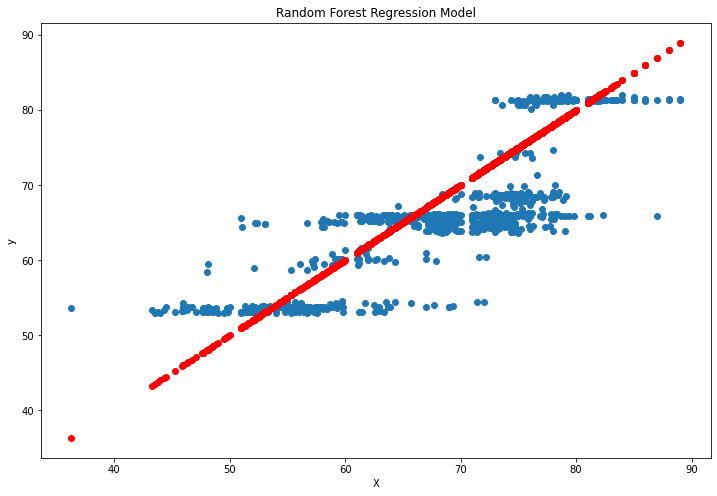

In [185]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, Final_predictions)     
plt.plot(y_test,y_test, 'ro')   
plt.title('Random Forest Regression Model')
plt.xlabel('X')
plt.ylabel('y')